In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Churn_Modelling.csv')

In [4]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## Q1 - Finding missing value percentage

In [5]:
df.isnull().sum()/len(df) * 100

RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

In [6]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

## Q2 A. Does EstimatedSalary have any effect on its churning Status

<AxesSubplot:xlabel='Exited'>

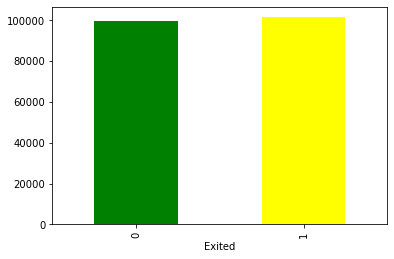

In [7]:
df.groupby('Exited')['EstimatedSalary'].mean().plot(kind = 'bar', color = ['green', 'yellow'])

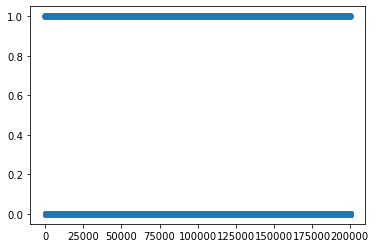

In [8]:
# It does not affect
plt.scatter(data = df, x = 'EstimatedSalary', y = 'Exited')

In [9]:
from scipy.stats import ttest_ind

In [10]:
stats, p = ttest_ind(df['EstimatedSalary'], df['Exited'])
stats, p 

(174.03786904734002, 0.0)

## Q2.B. Visually compare the average salary of people between the different geographies for people who have churned vs who have not not churned

In [11]:
pt = pd.pivot_table(index = 'Geography', values = 'EstimatedSalary', aggfunc= 'mean', columns = 'Exited', data = df)
pt

Exited,0,1
Geography,,
France,99217.097331,103439.278296
Germany,102414.657876,98403.886450
Spain,98602.369864,103629.554818


<AxesSubplot:xlabel='Geography'>

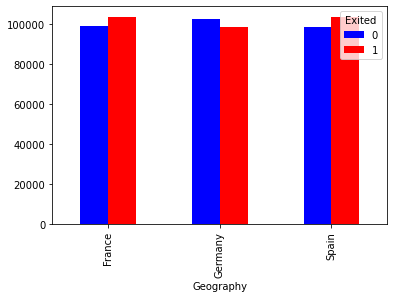

In [12]:
pt.plot(kind = 'bar', color = ['blue', 'red'])

In [13]:
pt3 = pd.pivot_table(index = 'Exited', values = 'EstimatedSalary', aggfunc= 'mean', columns = 'Geography', data = df)
pt3

Geography,France,Germany,Spain
Exited,,,
0,99217.097331,102414.657876,98602.369864
1,103439.278296,98403.886450,103629.554818


<AxesSubplot:xlabel='Exited'>

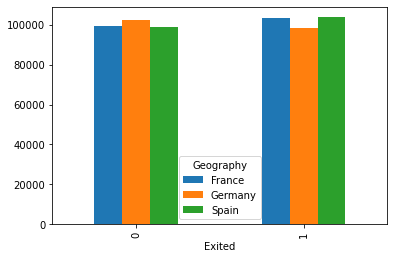

In [14]:
pt3.plot(kind = 'bar')

In [15]:
pt2 = pd.pivot_table(index = ['Geography'], values = 'EstimatedSalary', aggfunc= 'mean', columns = ['Exited', 'Gender'], data = df)
pt2

Exited                 0                             1               
Gender            Female           Male         Female           Male
Geography                                                            
France      98526.820627   99734.445789  103626.025065  103193.839686
Germany    103987.042242  101181.577505   99884.458728   96591.601257
Spain       98900.649091   98390.161260  107544.095758   98661.099011

<AxesSubplot:xlabel='Geography'>

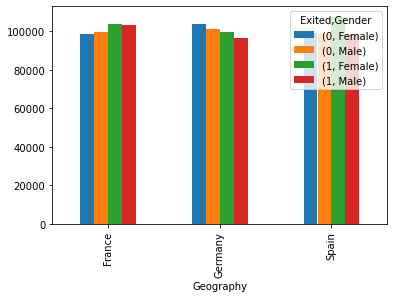

In [16]:
pt2.plot(kind = 'bar')

## Q3A - Which geography has the highest churn rate? Show the comparison in visualiation

In [17]:
geo_cr1 = pd.crosstab(df['Geography'], df['Exited']).reset_index()
geo_cr1

Exited,Geography,0,1
0,France,4204,810
1,Germany,1695,814
2,Spain,2064,413


In [18]:
geo_cr1['churn_rate'] = geo_cr1[1] / (geo_cr1[0] + geo_cr1[1])
geo_cr1

Exited,Geography,0,1,churn_rate
0,France,4204,810,0.161548
1,Germany,1695,814,0.324432
2,Spain,2064,413,0.166734


<AxesSubplot:xlabel='Geography'>

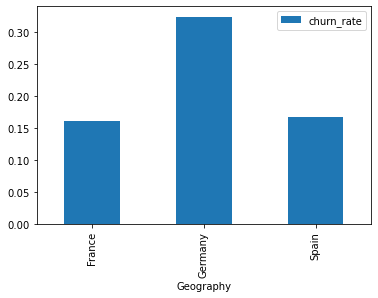

In [19]:
geo_cr1.plot(kind = 'bar', x = 'Geography', y = 'churn_rate')

Hence, Germany has highest churn rate

## Q3B Average Credit Score of customers who have churned is less than the av credit scores of customers who have not not churned. Test this hypothesis with the help of a statistical test

In [20]:
df[df['Exited'] == 1]['CreditScore'].mean()

645.3514972999509

In [21]:
df[df['Exited'] == 0]['CreditScore'].mean()

651.8531960316463

In [22]:
from scipy.stats import ttest_ind

In [23]:
stats, p = ttest_ind(df[df['Exited'] == 1]['CreditScore'], df[df['Exited'] == 0]['CreditScore'])
stats, p

(-2.7100778888729833, 0.006738213892192373)

p < 0.05 that means their mean are not equal. Hence accept the alternate hypothesis that av cr score of customers who have churned is less than who have not churned

<AxesSubplot:xlabel='Exited', ylabel='CreditScore'>

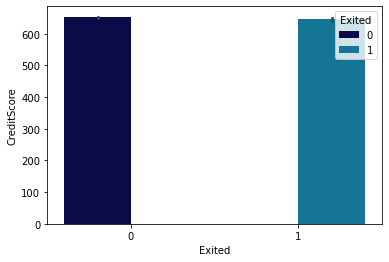

In [24]:
sns.barplot(data = df, y = df['CreditScore'], x = df['Exited'], palette= 'ocean', hue = df['Exited'])

<AxesSubplot:xlabel='Exited', ylabel='CreditScore'>

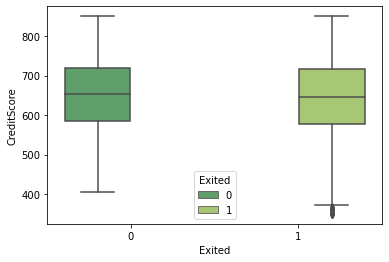

In [25]:
sns.boxplot(data = df, y = df['CreditScore'], x = df['Exited'], palette= 'summer', hue = df['Exited'])

## Q4A Divide the 'Age' variable into suitable sized bins and show the frequency of the churned population for each bin? What can you comment about the distribution?

In [27]:
bins = [10,20,30,40,50,60,70,80]

age_labels = ['10-20', '20-30', '30-40', '40-50', '50-60', '70-80', '80+']

df['Age_Category'] = pd.cut(df['Age'], bins, labels = age_labels)

In [28]:
age_cat = pd.crosstab(df['Age_Category'], df['Exited'])
age_cat

Exited,0,1
Age_Category,,
10-20,84,5
20-30,1736,143
30-40,3913,538
40-50,1532,788
50-60,349,448
70-80,227,104
80+,111,10


In [29]:
from scipy.stats import chi2_contingency

stats, p,  dof, expected = chi2_contingency(age_cat )
stats, p

(1319.479592700422, 6.5717174468424455e-282)

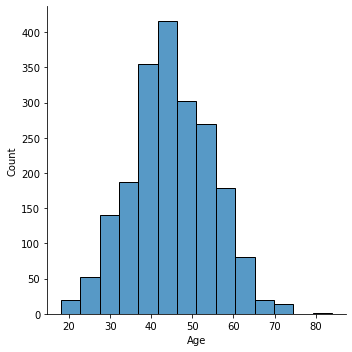

In [26]:
sns.displot(df[df['Exited'] == 1]['Age'], bins = 14)

## Q4B Can you prove with statistical test if the churning rate depends on the age group

In [27]:
stats, p = ttest_ind(df['Age'], df['Exited'])
stats, p 

(368.90059346979893, 0.0)

## Q4C Check to see if the feature "hasCrCard" has a statistically significant relationship with the target Exited

In [28]:
contingency_data = pd.crosstab(df['HasCrCard'], df['Exited'])
contingency_data 

Exited,0,1
HasCrCard,,
0,2332,613
1,5631,1424


In [29]:
from scipy.stats import chi2_contingency

stats, p,  dof, expected = chi2_contingency(contingency_data )
stats, p

(0.47133779904440803, 0.49237236141554686)

**HasCrCard feature is independent from Exited**

## Q5A Build a prediction model with 4 features

In [30]:
X = df[['CreditScore', 'Geography', 'Age', 'EstimatedSalary']]

In [31]:
y = df['Exited']

In [32]:
geo_dummies = pd.get_dummies(X['Geography'])
geo_dummies.head()

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1


In [33]:
df_new = pd.concat([X, geo_dummies], axis = 1)
df_new.head()

,CreditScore,Geography,Age,EstimatedSalary,France,Germany,Spain
0,619,France,42,101348.88,1,0,0
1,608,Spain,41,112542.58,0,0,1
2,502,France,42,113931.57,1,0,0
3,699,France,39,93826.63,1,0,0
4,850,Spain,43,79084.10,0,0,1


In [34]:
df_new.drop(['Geography', 'Spain'], axis = 1, inplace = True)

In [35]:
x_dummies = df_new
x_dummies

,CreditScore,Age,EstimatedSalary,France,Germany
0,619,42,101348.88,1,0
1,608,41,112542.58,0,0
2,502,42,113931.57,1,0
3,699,39,93826.63,1,0
4,850,43,79084.10,0,0
...,...,...,...,...,...
9995,771,39,96270.64,1,0
9996,516,35,101699.77,1,0
9997,709,36,42085.58,1,0
9998,772,42,92888.52,0,1


In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(x_dummies,y, test_size= 0.2, random_state= 10)

In [38]:
X_train.shape

(8000, 5)

In [39]:
X_test.shape

(2000, 5)

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
model = DecisionTreeClassifier()

In [42]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [43]:
model.score(X_test, y_test)

0.729

In [44]:
from sklearn.metrics import accuracy_score

In [45]:
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

In [46]:
acc

0.729

In [47]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_model = BaggingClassifier(
    base_estimator= DecisionTreeClassifier(),
    n_estimators = 100,
    max_samples = 0.8,
    oob_score = True,
    random_state= 10
)

In [48]:
bag_model.fit(X_train, y_train)
bag_model.oob_score_

0.802625